In [20]:
# импортируем библиотеки numpy и sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #для визуализации
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans 

In [4]:
# загружаем данные
df = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/686ad91a465b883d679beee67dd2600a/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/pokemon.zip')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


In [6]:
X = df[['Attack', 'Defense']]

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

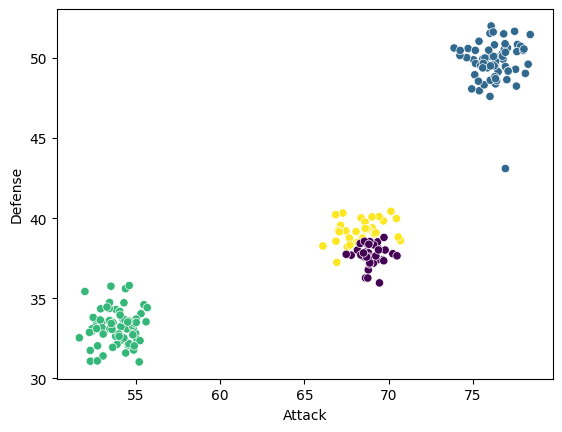

In [15]:
gm_clustering = GaussianMixture(n_components=4, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)
sns.scatterplot(data=X, x='Attack', y='Defense', c=gm_prediction)

n_components — количество кластеров.  
random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

In [9]:
help(GaussianMixture)

Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)
 |  GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
 |  
 |  Gaussian Mixture.
 |  
 |  Representation of a Gaussian mixture model probability distribution.
 |  This class allows to estimate the parameters of a Gaussian mixture
 |  distribution.
 |  
 |  Read more in the :ref:`User Guide <gmm>`.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  n_components : int, default=1
 |      The number of mixture components.
 |  
 |  covariance_type : {'full', 'tied', 'diag', 'spherical'}, default='full'
 |      String describing the type of covariance parameters to use.
 |      Must be one of:
 |  
 |      - 'full': each component has 

### Задание 5.4

In [16]:
df = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/c5ffc8e0c422b2cd1ed3e2ec0b50a7b8/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/housing.zip')
df.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


<AxesSubplot: xlabel='year', ylabel='price'>

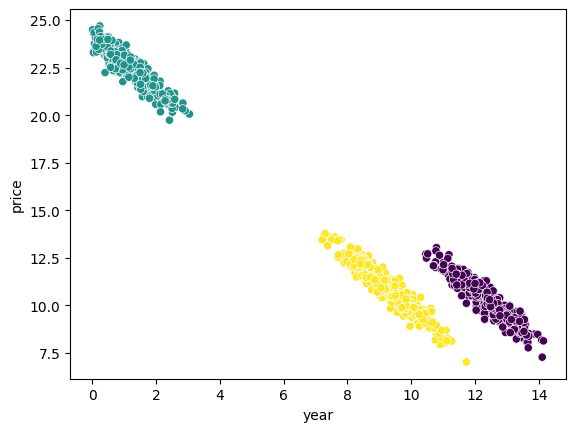

In [19]:
gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(df)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(df)
sns.scatterplot(data=df, x='year', y='price', c=gm_prediction)

<AxesSubplot: xlabel='year', ylabel='price'>

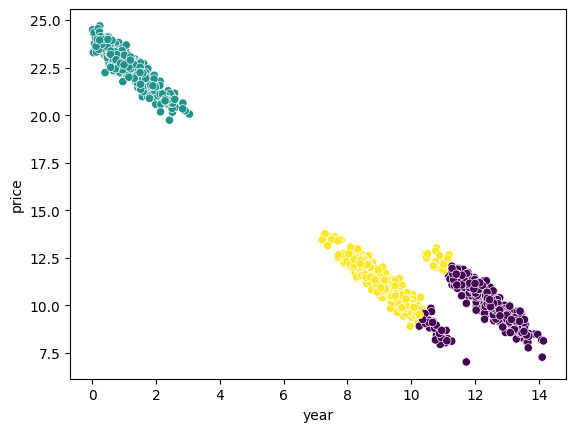

In [21]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# обучаем модель 
kmeans.fit(df)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
kmeans = kmeans.predict(df)
sns.scatterplot(data=df, x='year', y='price', c=kmeans)